In [1]:
import os
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf #https://anaconda.org/anaconda/statsmodels
import statsmodels.api as sm #https://scikit-posthocs.readthedocs.io/en/latest/installation/
import scikit_posthocs as sp
import itertools as it
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_paths = glob.glob('/media/haley/My Book/Ecoli_results/Ecoli_ARETE_Results_Organized/host_range_refseq/Fasta_for_Plasmid_Refseq/EC*_matches.tsv')
data = []

for path in file_paths:
    with open(path, 'r') as f:
        first_row = f.readline().rstrip('\n')
        row_data = first_row.split('\t')
        row_data.insert(0, path.split('/')[-1])  # Add file name as first column
        data.append(row_data)

df = pd.DataFrame(data)

NameError: name 'glob' is not defined

In [4]:
df.columns =['File', 'qseqid', 'sseqid', 'pident', 'slen', 'qlen', 'length', 'mismatch', 'gapopen', 'qstart', 'qend', 'sstart', 'send', 'send', 'evalue', 'bitscore']

In [6]:
df.to_csv('04202023_Refseq_host_range_tophitperplasmid.csv')

In [25]:
refseq = pd.read_csv("/media/haley/My Book/Ecoli_results/Ecoli_ARETE_Results_Organized/04202023_Refseq_host_range_tophitperplasmid_bacteria_protein.csv")

In [26]:
refseq['Plasmid'] = refseq['File'].str.split('_').str[5]

In [27]:
refseq_nonovel = refseq[refseq["Plasmid"].str.contains("novel")==False]

In [28]:
refseqcrosstab = pd.crosstab(refseq_nonovel.Plasmid, refseq_nonovel.sseqid_Organism)

In [29]:
refseqcrosstab

sseqid_Organism,Bacteria,Enterobacter_hormaechei,Enterobacterales,Enterobacteriaceae,Escherichia,Escherichia_albertii,Escherichia_coli,Escherichia_fergusonii,Escherichia_marmotae,Gammaproteobacteria,Klebsiella sp. FDAARGOS_511,Klebsiella_aerogenes,Klebsiella_pneumoniae,Pseudomonadota,Salmonella_enterica,Shigella_flexneri
Plasmid,,,,,,,,,,,,,,,,
AA144,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
AA151,0,0,0,0,0,0,4,0,0,1,0,0,0,0,0,0
AA152,0,0,0,3,0,0,0,1,0,0,0,0,0,0,0,0
AA155,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0
AA159,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AF190,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
AF232,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0
AF267,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [30]:
mPA= refseqcrosstab.sum(axis = 0)
PA2 = pd.DataFrame(data=mPA)
PA3 = PA2.reset_index()
PA3.columns = ['Host_Range', 'Total']

In [31]:
PA3.sort_values("Total", ascending=False)

,Host_Range,Total
6,Escherichia_coli,239
3,Enterobacteriaceae,221
0,Bacteria,157
4,Escherichia,68
7,Escherichia_fergusonii,58
9,Gammaproteobacteria,26
12,Klebsiella_pneumoniae,23
13,Pseudomonadota,14
2,Enterobacterales,12
5,Escherichia_albertii,9


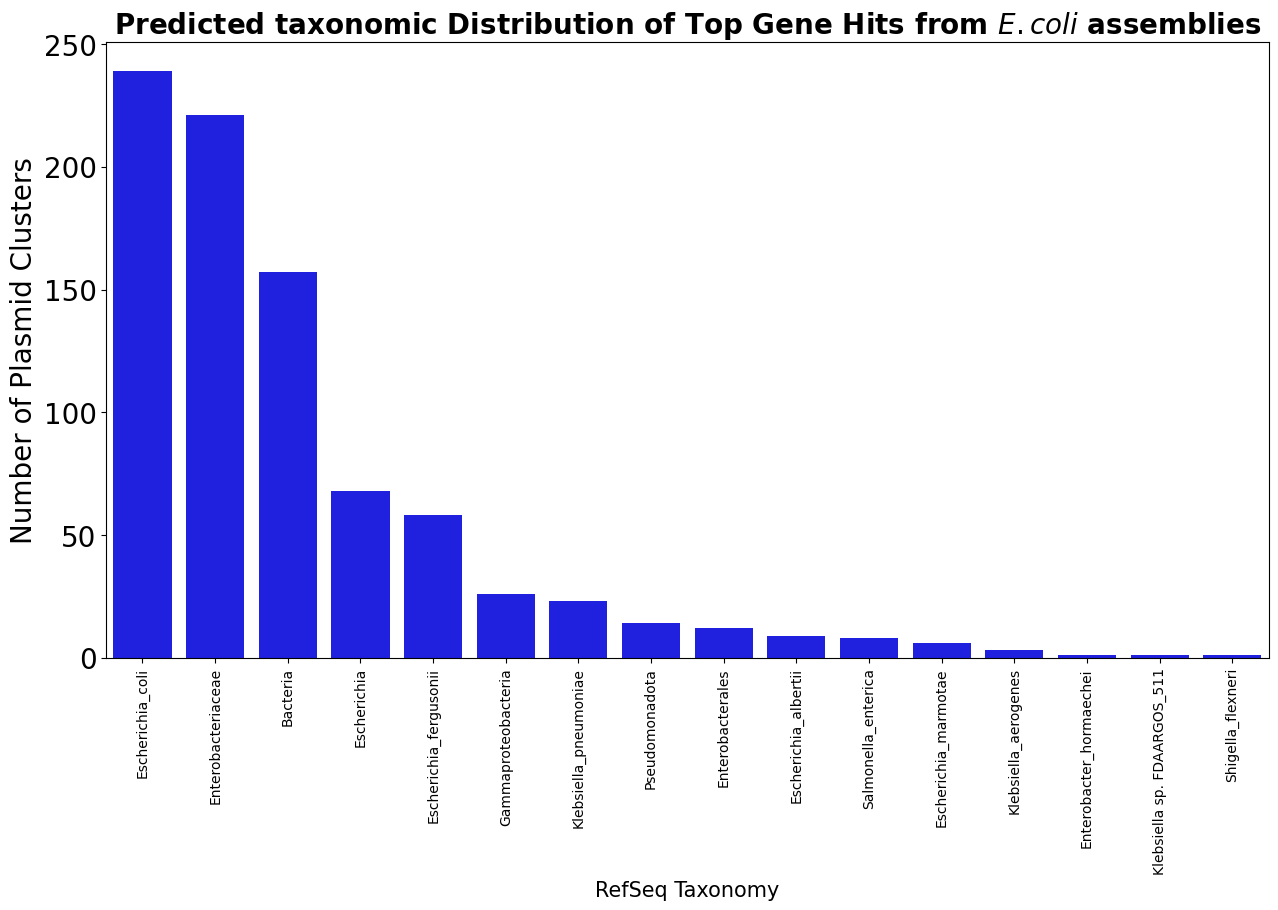

In [33]:
plt.figure(figsize = (15,8))
ax = sns.barplot(data=PA3, x="Host_Range", y="Total", color= 'b', order=PA3.sort_values(by='Total', ascending=False).Host_Range)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title(r'Predicted taxonomic Distribution of Top Gene Hits from $E.coli$ assemblies', fontsize = 20, fontweight = 'bold')
plt.xlabel("RefSeq Taxonomy",fontsize = 15)
plt.ylabel("Number of Plasmid Clusters",fontsize = 20)
plt.xticks(fontsize= 10)
plt.yticks(fontsize= 20)
plt.savefig("04212023_EcoliPlasmidDetection_refseq_plasmidhostrangebarplotallassemblies.png", dpi=400, bbox_inches="tight")